In [256]:
import numpy as np
from PIL import Image
from matplotlib import pyplot as plt
import glob
import os
import cv2
import tifffile as tiff
import csv

In [257]:
pred_mem = []
pred_nuc = []
for file in os.listdir("data/mesmer"):
    if file.__contains__("whole"):
        im = Image.open(f"data/mesmer/{file}")
        im = np.array(im)
        pred_mem.append(im)
    if file.__contains__("nuclear"):
        im = Image.open(f"data/mesmer/{file}")
        im = np.array(im)
        pred_nuc.append(im)

In [258]:
gt_mem = [] # ground truth
gt_nuc = []

for file in os.listdir("data/annotated/"):
    path = os.path.join("data/annotated/", file)
    if os.path.isfile(path):
        if path.__contains__("membrane"):
            im = cv2.imread(os.path.join("data/annotated/", file))
            im = cv2.resize(im,(512,512))
            im = np.array(im[:,:,0])
            gt_mem.append(im)
        elif path.__contains__("nuclei"):
            im = cv2.imread(os.path.join("data/annotated/", file))
            im = cv2.resize(im,(512,512))
            im = np.array(im[:,:,0])
            gt_nuc.append(im)


In [259]:
def normalise(image):
    # Set the threshold value
    threshold = 0.1  # Adjust this threshold value as needed

    # Apply normalization
    normalized_image = np.where(image > threshold, 255, 0)

    # Convert the normalized NumPy array back to PIL image
    normalized_image_pil = Image.fromarray(normalized_image.astype(np.uint8))

    # Display or save the normalized image
    return normalized_image

In [260]:
pred_mem = normalised_image = list(map(normalise, pred_mem))
pred_nuc = normalised_image = list(map(normalise, pred_nuc))
gt_mem = normalised_image = list(map(normalise, gt_mem))
gt_nuc = normalised_image = list(map(normalise, gt_nuc))

In [261]:
np.shape(pred_mem)

(10, 512, 512)

In [262]:
type(pred_mem[0])

numpy.ndarray

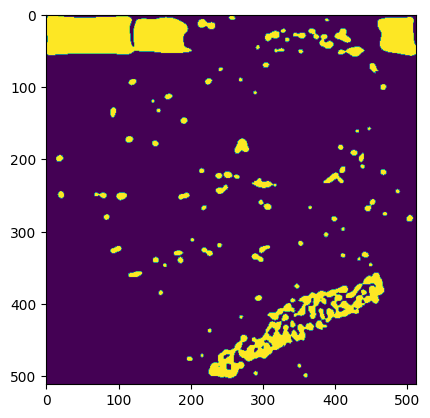

In [263]:
plt.imshow(pred_mem[0],interpolation=None)

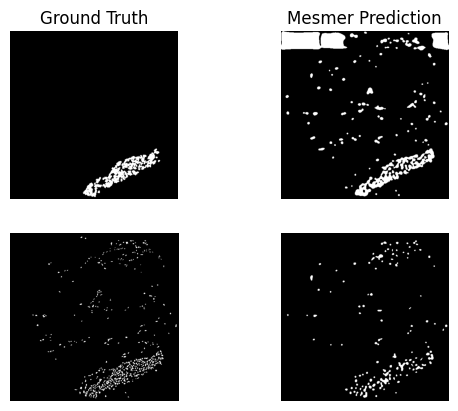

In [289]:
fig, ax = plt.subplots(nrows=2,ncols=2)
ax[0,0].imshow(gt_mem[0], cmap = "gray")
ax[0,0].set_axis_off()
ax[0,0].set_title("Ground Truth")
ax[0,1].imshow(pred_mem[0], cmap = "gray")
ax[0,1].set_axis_off()
ax[0,1].set_title("Mesmer Prediction")
ax[1,0].imshow(gt_nuc[0], cmap = "gray")
ax[1,0].set_axis_off()
ax[1,1].imshow(pred_nuc[0],cmap = "gray")
ax[1,1].set_axis_off()
plt.show()

In [265]:
def calculate_iou(binary_mask1, binary_mask2):
    # Calculate intersection and union
    intersection = np.logical_and(binary_mask1, binary_mask2)
    union = np.logical_or(binary_mask1, binary_mask2)

    # Avoid division by zero
    if np.sum(union) == 0:
        return 0.0

    # Calculate IoU
    iou = np.sum(intersection) / np.sum(union)
    
    return iou

In [266]:
name_column = []
for file in os.listdir("data/annotated/"):
    path = os.path.join("data/annotated/", file)
    if os.path.isfile(path) == False:
        if path.__contains__("membrane"):
            name_column.append(path.removeprefix("data/annotated/membrane_data_"))
        elif path.__contains__("nuclei"):
            name_column.append(path.removeprefix("data/annotated/nuclei_data_"))
    

In [267]:
mem_iou = list(map(calculate_iou, gt_mem,pred_mem))
nuc_iou = list(map(calculate_iou, gt_nuc,pred_nuc))

In [268]:
sum(mem_iou) / len(mem_iou) 

0.2842923599825707

In [269]:
sum(nuc_iou) / len(nuc_iou) 

0.30997939567834465